### Problem 1: Study response to an event.

As I see it Problem 1 has two parts which should be dealt a little differently. Thus this notebook has been made according to both the parts. 

Part A: This part is static one. Collecting and storing 20000 tweets on a chosen event, processing it to get the geocode information and plotting on map

Part B: This part is dynamic one. Here user can enter any query and plot the spatial information on map.  

#### Note: 
* All the steps common to both the parts are labelled as Step 1, Step 2, etc.
* All the steps related to Part A are labelled as Part A - Step 1, Part A - Step 2, etc.
* All the steps related to Part B are labelled as Part B - Step 1, Part B - Step 2, etc.


#### Part A: Topic Chosen: Grammy's 2017
Collect at least 20000 tweets for the chosen event. Group them by geo-location as in Google maps API (one more API) and plot them on the map of USA.

#### Approach:
* Search tweets for the chosen event 
* Convert search result tweets into dataframe
* Lookup screen name from this dataframe
* From Screen names get user info and convert into dataframe 
* Add the locations for the user's with screen names to tweets data frame. I saved a data.csv file for this data for safe side
* Get the geo code of the locations from this dataframe and add to tweets data frame and save as modified_data.csv
* Count the frequency of latitude and longitude pairs

#### Testing:
As the modified_data.csv already pre-proccessed, please execute as per the below flow:

Step 1 -> Step 2 -> Step 3 -> Part A - Step 9 -> Step 10

In [3]:
#Step 1: Install all the required packages to complete Problem 1

install.packages("twitteR")
install.packages("ggplot2")
install.packages("maps")
install.packages("ggmap")
install.packages("maptools")
install.packages("plyr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("plyr"):
“installation of package ‘plyr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


#### Note: 
* In case of issues with installation of "maptools" packages "gpclib" and then execute command gpclibPermit() to set it to TRUE
* I installed plyr using terminal command: conda install -c r r-plyr

In [4]:
#Step 2:Import all the above installed packages

library(twitteR)
library(ggplot2)
library(maps)
library(ggmap)
library(maptools)
library(plyr)

Loading required package: sp
Checking rgeos availability: TRUE

Attaching package: ‘plyr’

The following object is masked from ‘package:maps’:

    ozone

The following object is masked from ‘package:twitteR’:

    id



In [5]:
#Step 3: Authenticating in order to use the Twitter Search API

setup_twitter_oauth("cThiEKEuj1xbncJEbCAXFOmUO","0x6ka7SGH40pzw3L9ccvMThqO6FezQXDNeJp6DK947jxOAZFRV", "772583706783612932-2MPBfAcvpRzXP78C3aeYYFof7Xfj5vk", "GgOWWzRDhBuSYD0jaPvHAZCAH4WPg3RolpOdNtVjDnHnC")

[1] "Using direct authentication"


In [ ]:
#Part A - Step 4: Search and fetch tweets via Twitter Search API 

query <- '#Grammys2017'
tweets <-searchTwitter(query, n=20000)
tweets_df <-twListToDF(tweets)

In [ ]:
#Part A - Step 5: Getting userinfo using the screenName of all users. This user info contains the states, users belong to. 

userInfo <- lookupUsers(tweets_df$screenName)
userFrame <- twListToDF(userInfo)
location <- c(userFrame$location)

In [ ]:
#Part A - Step 6: Merging the user locations with the tweets dataframe 

newTweets_df <- merge(tweets_df, userFrame, by = "screenName")

#Can store the tweets in csv as well for later use using the below command
#write.csv(newTweets_df, file = "/home/anushree/data.csv")

In [ ]:
#Part A - Step 7: Using Data Science Toolkit to fetch latitude and longitude for the the user locations in csv

n <- length(newTweets_df$location)
newTweets_df$user_lat <- 0
newTweets_df$user_long <- 0

for(i in 1:n){ 
   
   coord <- try(geocode(newTweets_df$location[i], output="latlon", source="dsk"))
    
   if(class(coord) == 'try-error') next 
   if(is.na(coord[1]) || is.na(coord[2])) next
       
   if(length(coord$lat) == 0 || length(coord$lon) == 0)next
   else
       newTweets_df$user_lat[i] <- coord$lat
       newTweets_df$user_long[i] <- coord$lon
 }

In [ ]:
#Part A - Step 8: Adding latitude and longitude to tweets in csv file 

write.csv(newTweets_df, file = "/home/anushree/modified_data.csv")

In [5]:
#Part A - Step 9: Reading the preprocessed csv file with tweets and geolocation data. 
#Calcuting the location wise tweet frequency and storing in a data frame

newTweets_df <- read.csv(file = "/home/anushree/modified_data.csv")
final_df <- count(newTweets_df, c('user_lat', 'user_long'))

#### Part B: Generalization
Generalize the solution for any twitter search hashtag. We should be able to reproduce the results for any event or happening of your choice. Add a text input as a widget so that user can interact with your program with their choice of search word for the twitter search API.

#### Approach:
Here I have followed the same approach as Part A, except that I always deal with data frames only. No csv files are made during the search as this part will be done for lesser number of tweets and is suppose to be dynamic.

#### Testing:
To test this please execute as per the below flow: 

Step 1 -> Step 2 -> Step 3 -> Part B - Step 4 -> Part B - Step 5 -> Part B - Step 6 -> Part B - Step 7 -> Part B - Step 8 -> Part B - Step 9 -> Step 10

In [6]:
#Part B - Step 4: Search and fetch tweets via Twitter Search API

query <- '#SuperBowl'
tweets <-searchTwitter(query, n=1000)
tweets_df <-twListToDF(tweets)

#### Note: 
Please change the value for query to search with a different hashtag

In [7]:
#Part B - Step 5: Getting userinfo using the screenName of all users. This user info contains the states, users belong to. 

userInfo <- lookupUsers(tweets_df$screenName)
userFrame <- twListToDF(userInfo)
location <- c(userFrame$location)

In [8]:
#Part B - Step 6: Merging the user locations with the tweets dataframe 

newTweets_df <- merge(tweets_df, userFrame, by = "screenName")

In [9]:
#Part B - Step 7: Using Google API to fetch latitude and longitude for the the user locations

n <- length(newTweets_df$location)
newTweets_df$user_lat <- 0
newTweets_df$user_long <- 0

for(i in 1:n){ 
   
   coord <- try(geocode(newTweets_df$location[i], output="latlon", source="dsk"))
    
   if(class(coord) == 'try-error') next 
   if(is.na(coord[1]) || is.na(coord[2])) next
       
   if(length(coord$lat) == 0 || length(coord$lon) == 0)next
   else
       newTweets_df$user_lat[i] <- coord$lat
       newTweets_df$user_long[i] <- coord$lon
 }

Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Rep%C3%BAblica%20das%20Bananas&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "República das Bananas"”Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=@lyphsart%20//%20(they/she)&sensor=false
Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Neverland%20Ranch%20&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Neverland Ranch "”Warning message:
“geocode failed with status ZERO_RESULTS, location = "Neverland Ranch "”Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=United%20States&sensor=false
Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Wigan,%20England&sensor=false
Information from URL : http://www.datasciencetoolkit.org/maps/api/geocode/json?address=Try%20and%20find%20my%20plan

In [10]:
#Part B - Step 8: Adding latitude and longitude to tweets

longitude <- newTweets_df$user_long
latitude <- newTweets_df$user_lat
updated_df <- data.frame(newTweets_df$location, longitude, latitude) 

In [14]:
#Part B - Step 9: Calcuting the location wise tweet frequency and storing in a data frame

final_df <- count(updated_df, c('longitude', 'latitude'))
colnames(final_df) <- c("user_long", "user_lat", "freq")

#### Note: 
Step 10 is common for both the parts. 

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=USA&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Warning message:
“Removed 100 rows containing missing values (geom_point).”

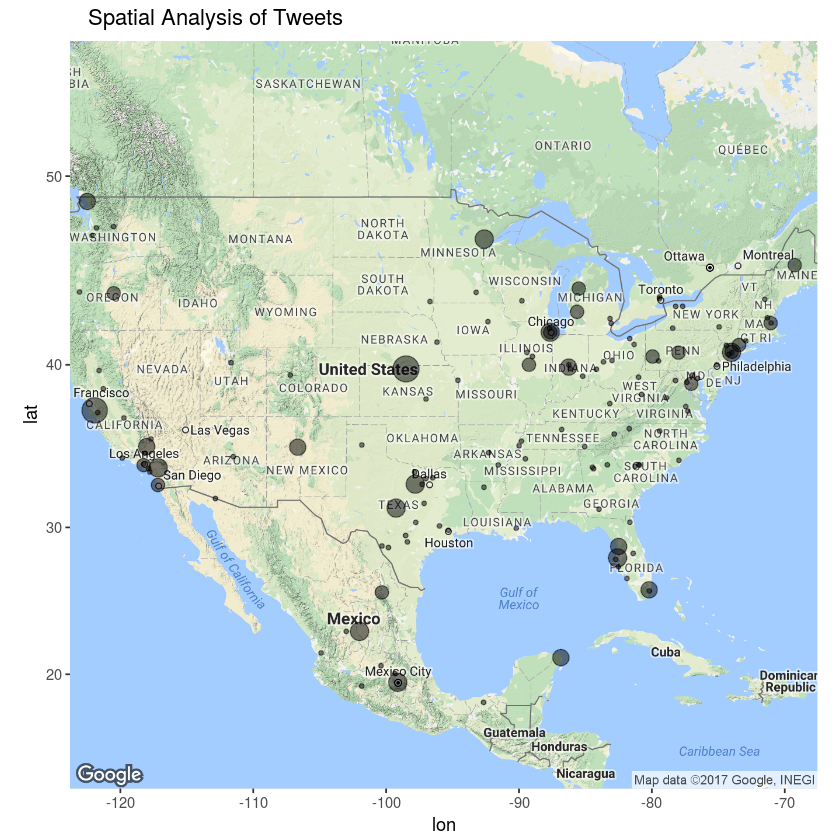

In [15]:
#Step 10: Mapping all the data onto the density bubble map

map <- get_map(location = 'USA', zoom = 4)
mapPoints <- ggmap(map) + geom_point(aes(x = user_long, y = user_lat, size = sqrt(freq)), data = final_df, alpha = 0.5) + scale_size_continuous(range=c(1,20)) + theme(legend.position = "none") + ggtitle("   Spatial Analysis of Tweets")
mapPoints

### References:

[1] J. Gentry. TwitteR Vignette: A Twitter Client for R. http://geoffjentry.hexdump.org/twitteR.pdf

[2] The R Language. https://cran.r-project.org/

[3] Points, as for a scatterplot http://docs.ggplot2.org/0.9.3.1/geom_point.html

[4] TwitteR package. https://cran.r-project.org/web/packages/twitteR/twitteR.pdf

[5] Used to add geolocation to dataframe - http://stackoverflow.com/questions/29402528/append-data-frames-together-in-a-for-loop

[6] https://www.r-bloggers.com/the-advantages-of-using-count-to-get-n-way-frequency-tables-as-data-frames-in-r/

[7] Help to R commands - http://www.cookbook-r.com/Manipulating_data/

[8] Plotting Map - http://www.milanor.net/blog/maps-in-r-plotting-data-points-on-a-map/

[9] Plotting Map - http://sharpsightlabs.com/blog/bubble-chart-in-r-basic/